# Utkarsh Tripathi              

### Laptop Price Prediction                  20th feb  2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#from sklearn.model_selection import 

In [2]:
df = pd.read_csv('laptop_price.csv')
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df.drop(columns={'Unnamed: 0'}, inplace=True)

In [4]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
df.duplicated().sum()

28

## Feature Engineering

###  >> To convert Euro in Rupees

In [7]:
df['Price_euros'] = df['Price_euros']*84.52

In [8]:
df = df.rename(columns={'Price_euros':'Indian_Price'})

### >> Removing GB and Kg from Ram and Weight Columns

In [9]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [10]:
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Indian_Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,113230.5988


In [11]:
df['Ram'] = df['Ram'].astype(int)
df['Weight'] = df['Weight'].astype(float)

In [12]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Indian_Price      1303 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.2+ KB


In [14]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

## Data Anylsis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Indian_Price', ylabel='Density'>

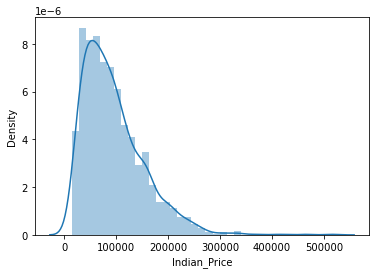

In [15]:
sb.distplot(df['Indian_Price'])

### सबसे ज्यादा बिकने वाले Laptops

<AxesSubplot:>

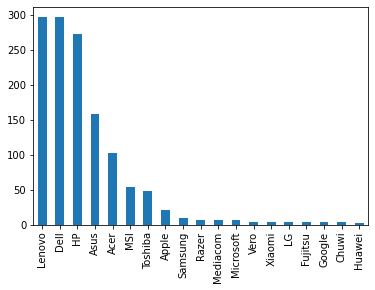

In [16]:
df['Company'].value_counts().plot(kind='bar')

<AxesSubplot:>

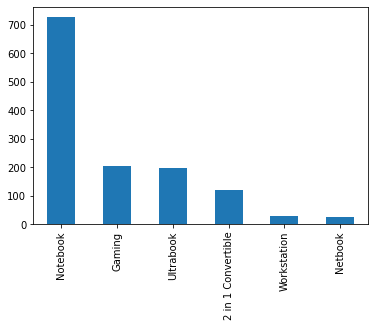

In [17]:
df['TypeName'].value_counts().plot(kind='bar')

### सबसे महंगी company के Laptops 

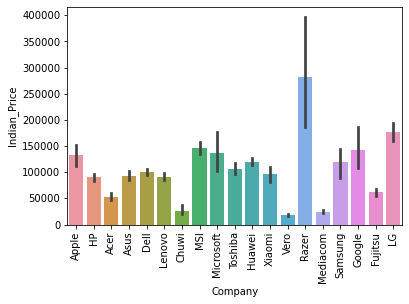

In [18]:
sb.barplot(x= df['Company'], y = df['Indian_Price'])
plt.xticks(rotation = 'vertical')
plt.show()

### Type of Laptop जो महंगा है । 

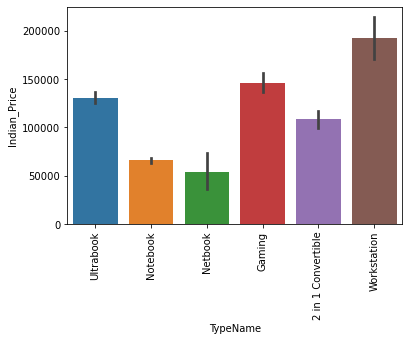

In [19]:
sb.barplot(x= df['TypeName'], y = df['Indian_Price'])
plt.xticks(rotation = 'vertical')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

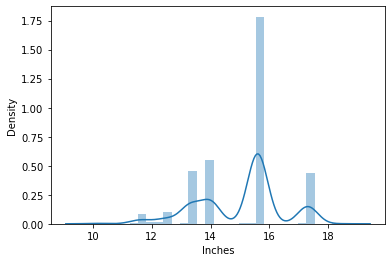

In [20]:
sb.distplot(df['Inches'])

### जो laptops 16 inches की है वो सबसे ज्यादा है । 

In [21]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Indian_Price      1303 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.2+ KB


In [22]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [23]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [24]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Indian_Price,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,113230.5988,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,75978.4088,0


<AxesSubplot:>

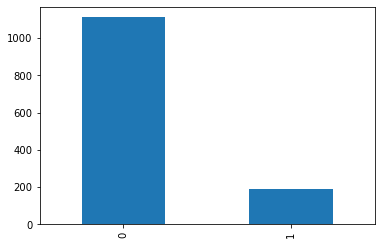

In [25]:
df['Touchscreen'].value_counts().plot(kind='bar')

#### मतलब की --- Touchscreen की Qualtity कम है । 

<AxesSubplot:xlabel='Touchscreen', ylabel='Indian_Price'>

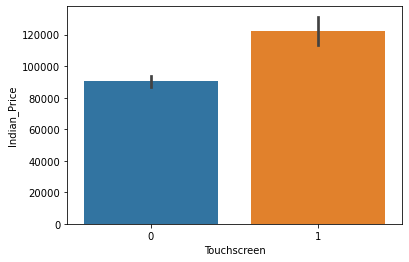

In [26]:
sb.barplot(x = df['Touchscreen'], y=df['Indian_Price'])

#### IPS  का new column create करेंगे जो laptop IPS diplay की होंगी वो 1 होगा । 

In [27]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [28]:
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Indian_Price,Touchscreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,113230.5988,0,1


<AxesSubplot:>

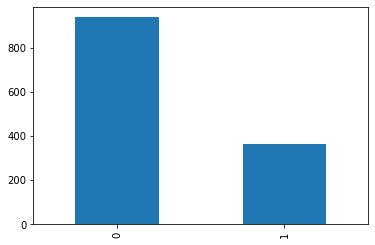

In [29]:
df['IPS'].value_counts().plot(kind='bar')

### अब ScreenResolution मे जहा पे x है वहाँ से split करेंगे 

In [30]:
df['ScreenResolution'].str.split('x')

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [31]:
df['ScreenResolution'].str.split('x', n = 1, expand=True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [32]:
new = df['ScreenResolution'].str.split('x', n = 1, expand=True)

In [33]:
df['X_resolution'] = new[0]
df['Y_resolution'] = new[1]

In [34]:
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Indian_Price,Touchscreen,IPS,X_resolution,Y_resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,113230.5988,0,1,IPS Panel Retina Display 2560,1600


In [35]:
df['X_resolution']

0               IPS Panel Retina Display 2560
1                                        1440
2                                Full HD 1920
3               IPS Panel Retina Display 2880
4               IPS Panel Retina Display 2560
                        ...                  
1298     IPS Panel Full HD / Touchscreen 1920
1299    IPS Panel Quad HD+ / Touchscreen 3200
1300                                     1366
1301                                     1366
1302                                     1366
Name: X_resolution, Length: 1303, dtype: object

#### X_resolution वाले column को clean करना पड़ेगा 

In [36]:
df['X_resolution'] = df['X_resolution'].str.extract('(\d\d\d\d)', expand = True)

#### X_resolution & Y_resolution को integer data type मे बदल देंगे 

In [37]:
df['X_resolution'] = df['X_resolution'].astype(int)
df['Y_resolution'] = df['Y_resolution'].astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Indian_Price      1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  X_resolution      1303 non-null   int32  
 15  Y_resolution      1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(

In [39]:
df.corr()['Indian_Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Indian_Price    1.000000
Touchscreen     0.191226
IPS             0.252208
X_resolution    0.556529
Y_resolution    0.552809
Name: Indian_Price, dtype: float64

### अब हमे pixel per inch निकालना है 

In [40]:
(df['X_resolution']**2 + df['Y_resolution']**2)**0.5/df['Inches']

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Length: 1303, dtype: float64

In [41]:
df['PPI'] = (df['X_resolution']**2 + df['Y_resolution']**2)**0.5/df['Inches'].astype(float)

In [42]:
df.corr()['Indian_Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Indian_Price    1.000000
Touchscreen     0.191226
IPS             0.252208
X_resolution    0.556529
Y_resolution    0.552809
PPI             0.473487
Name: Indian_Price, dtype: float64

In [43]:
df = df.drop(columns = ['X_resolution', 'Y_resolution', 'Inches','ScreenResolution'])

In [44]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [45]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
AMD A6-Series 9220 2.9GHz        1
Intel Core i5 6260U 1.8GHz       1
AMD E-Series E2-6110 1.5GHz      1
Intel Core i5 2.9GHz             1
Intel Core i5 7200U 2.50GHz      1
Name: Cpu, Length: 118, dtype: int64

In [46]:
df["CPU_name"] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [47]:
df.head(1)

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Indian_Price,Touchscreen,IPS,PPI,CPU_name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,113230.5988,0,1,226.983005,Intel Core i5


In [48]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [49]:
df['Cpu brand'] = df['CPU_name'].apply(fetch_processor)

<AxesSubplot:>

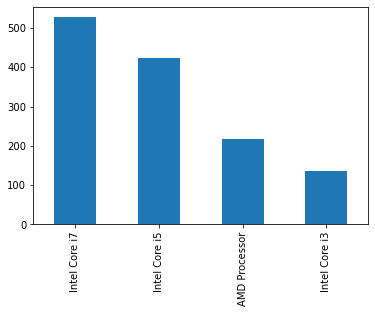

In [50]:
df['Cpu brand'].value_counts().plot(kind='bar')

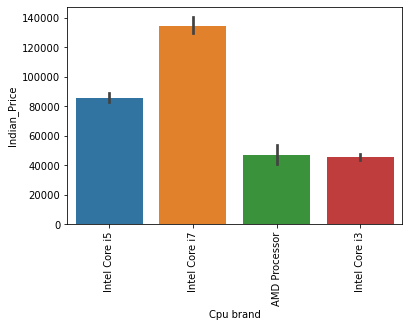

In [51]:
sb.barplot(x = df['Cpu brand'], y = df['Indian_Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [52]:
df.drop(columns=['Cpu', 'CPU_name'], inplace= True)

In [53]:
df.head(1)

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Indian_Price,Touchscreen,IPS,PPI,Cpu brand
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,113230.5988,0,1,226.983005,Intel Core i5


<AxesSubplot:>

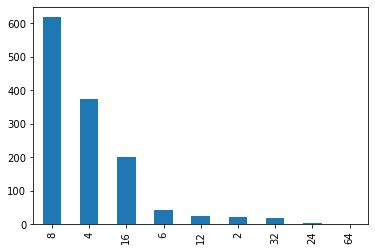

In [54]:
df['Ram'].value_counts().plot(kind='bar')

#### सबसे ज्यादा 8GB फिर 4GB की Rams बिकती है ।   

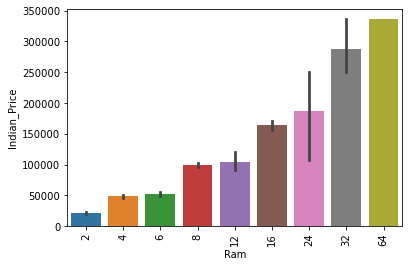

In [55]:
sb.barplot(x= df['Ram'], y = df['Indian_Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [56]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
new = df['Memory'].str.split("+", n =1, expand = True)

df['first'] = new[0]
df['first'] = df['first'].str.strip()

df['second']= new[1]

df['Layer1HDD'] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df['second'].fillna('0', inplace = True)





df['Layer2HDD'] = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')


df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

df['HDD']= (df['first']*df['Layer1HDD']+ df['second']*df['Layer2HDD'])
df['SSD']= (df['first']*df['Layer1SSD']+ df['second']*df['Layer2SSD'])
df['Hybrid']= (df['first']*df['Layer1Hybrid']+df["second"]*df["Layer2Hybrid"])
df['Flash_Storage']=(df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'] )


df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace = True)

<ipython-input-56-829a749f3dc8>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-56-829a749f3dc8>:29: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [57]:
df.head(1)

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Indian_Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,113230.5988,0,1,226.983005,Intel Core i5,0,128,0,0


In [58]:
df.corr()['Indian_Price']

Ram              0.743007
Weight           0.210370
Indian_Price     1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Indian_Price, dtype: float64

In [59]:
df.drop(columns=['Hybrid', 'Flash_Storage', 'Memory'], inplace= True)

In [60]:
df.head(1)

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Indian_Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,113230.5988,0,1,226.983005,Intel Core i5,0,128


In [61]:
df['Gpu'].value_counts()

Intel HD Graphics 620        281
Intel HD Graphics 520        185
Intel UHD Graphics 620        68
Nvidia GeForce GTX 1050       66
Nvidia GeForce GTX 1060       48
                            ... 
Nvidia GeForce GTX1050 Ti      1
AMD Radeon Pro 560             1
AMD FirePro W5130M             1
AMD R17M-M1-70                 1
Intel HD Graphics 620          1
Name: Gpu, Length: 110, dtype: int64

In [62]:
df['Gpu brand']= df['Gpu'].apply(lambda x:x.split()[0])

In [63]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [64]:
df = df[df['Gpu brand'] != 'ARM']

In [65]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

In [66]:
df.drop(columns=['Gpu'], inplace= True)

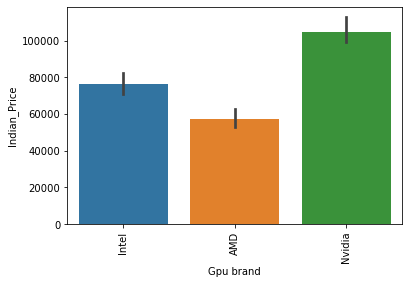

In [67]:
sb.barplot(x=df['Gpu brand'],y=df['Indian_Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1302 non-null   object 
 1   Product       1302 non-null   object 
 2   TypeName      1302 non-null   object 
 3   Ram           1302 non-null   int32  
 4   OpSys         1302 non-null   object 
 5   Weight        1302 non-null   float64
 6   Indian_Price  1302 non-null   float64
 7   Touchscreen   1302 non-null   int64  
 8   IPS           1302 non-null   int64  
 9   PPI           1302 non-null   float64
 10  Cpu brand     1302 non-null   object 
 11  HDD           1302 non-null   int64  
 12  SSD           1302 non-null   int64  
 13  Gpu brand     1302 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 179.8+ KB


In [70]:
df.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Indian_Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,113230.5988,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,75978.4088,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,No OS,1.86,48599.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,214465.2740,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,152440.2720,0,1,226.983005,Intel Core i5,0,256,Intel


In [71]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

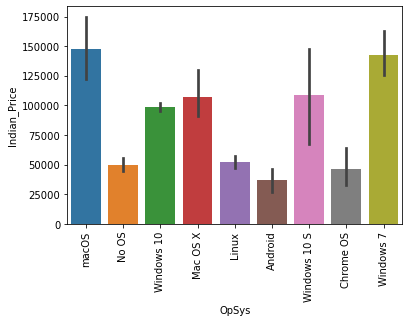

In [72]:
sb.barplot(x=df['OpSys'],y=df['Indian_Price'])
plt.xticks(rotation='vertical')
plt.show()

In [73]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [74]:
df['os'] = df['OpSys'].apply(cat_os)

In [75]:
df.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Indian_Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,113230.5988,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,75978.4088,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,No OS,1.86,48599.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,214465.2740,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,152440.2720,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [76]:
df.drop(columns=['OpSys'],inplace=True)

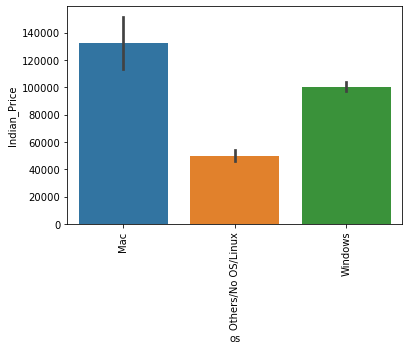

In [77]:
sb.barplot(x=df['os'],y=df['Indian_Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

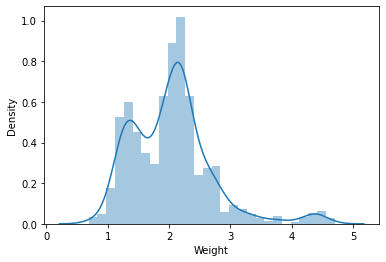

In [78]:
sb.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Indian_Price'>

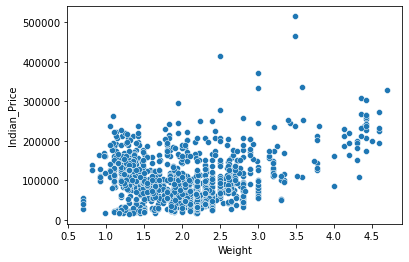

In [79]:
sb.scatterplot(x=df['Weight'],y=df['Indian_Price'])

In [80]:
df.corr()['Indian_Price']

Ram             0.742905
Weight          0.209867
Indian_Price    1.000000
Touchscreen     0.192917
IPS             0.253320
PPI             0.475368
HDD            -0.096891
SSD             0.670660
Name: Indian_Price, dtype: float64

<AxesSubplot:>

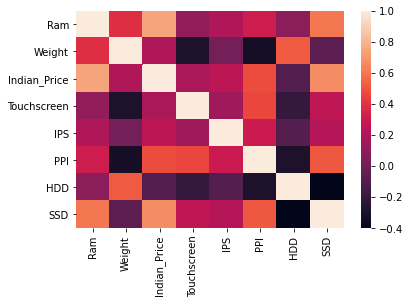

In [81]:
sb.heatmap(df.corr())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Indian_Price', ylabel='Density'>

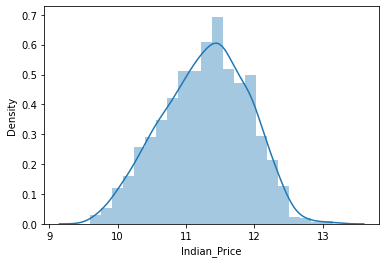

In [82]:
sb.distplot(np.log(df['Indian_Price']))

In [83]:
X = df.drop(columns=['Indian_Price'])
y = np.log(df['Indian_Price'])

In [104]:
X


,Company,Product,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,MacBook Pro,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,2,1.50,0,0,111.935204,AMD Processor,0,0,Intel,Windows
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [84]:
y

0       11.637182
1       11.238204
2       10.791358
3       12.275903
4       11.934528
          ...    
1298    10.895326
1299    11.749542
1300     9.870710
1301    11.075556
1302    10.347785
Name: Indian_Price, Length: 1302, dtype: float64

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 183 to 1193
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1106 non-null   object 
 1   Product      1106 non-null   object 
 2   TypeName     1106 non-null   object 
 3   Ram          1106 non-null   int32  
 4   Weight       1106 non-null   float64
 5   Touchscreen  1106 non-null   int64  
 6   IPS          1106 non-null   int64  
 7   PPI          1106 non-null   float64
 8   Cpu brand    1106 non-null   object 
 9   HDD          1106 non-null   int64  
 10  SSD          1106 non-null   int64  
 11  Gpu brand    1106 non-null   object 
 12  os           1106 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 116.6+ KB


In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [88]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [107]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)  
  

In [108]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 1302)  
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'Acer'